# Tarea 1. Repaso de teoría de probabilidad

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://storage.needpix.com/rsynced_images/bayesian-2889576_1280.png" width="200px" height="180px" />

Esta constituye la primera tarea del curso. Las tareas están pensadas para que afiances los conocimientos vistos en clase, repases la clase y debas darle una segunda leida. Incluso revisar otro material.

Esta primera tarea contiene ejercicios para que repases conceptos básicos de teoría de probabilidad.

Por favor, intenta ser lo más explícit@ posible, y en lo posible, apóyate de la escritura matemática con $\LaTeX$.

Recuerda además que ante cualquier duda, me puedes contactar al correo esjimenezro@iteso.mx.

<p style="text-align:right;"> Imagen recuperada de: https://storage.needpix.com/rsynced_images/bayesian-2889576_1280.png.</p>

___

## 1. 

Supongamos que una prueba para la COVID-19 tiene una precisión del 95%. Esto es, si el paciente está infectado, entonces el resultado de la prueba será positivo con probabilidad de 0.95, y si el paciente NO está infectado, el resutado de la prueba será negativo con probabilidad de 0.95.

Además, supongamos que la probabilidad de estar infectado es de 0.017 (1.7%).

Ahora, suponga que una persona tuvo un resultado de prueba positivo.

1. ¿Cuál es la probabilidad de que esta persona esté infectada en efecto?

2. ¿Cuál es la probabilidad de que no esté infectada?

## 2. 

(Ejercicio 1.3 Pattern Recognition and Machine Learning, by Christopher M. Bishop.) 

Supongamos que tenemos tres cajas: $r$ (roja), $a$ (azul), y $v$ (verde). Los contenidos de las cajas son:

- $r$: 3 manzanas, 4 naranjas, y 3 limas.
- $a$: 1 manzanas, 1 naranjas, y 0 limas.
- $v$: 3 manzanas, 3 naranjas, y 4 limas

Si la caja se elige aleatoriamente con probabilidades $p(r) = 0.2$, $p(b) = 0.2$, $p(g) = 0.6$, y una fruta se selecciona de la caja elegida, con igual probabilidad de seleccionar cualquier elemento de la caja, 

1. ¿Cuál es la probabilida de seleccionar una manzana?
2. Si observamos que la fruta seleccionada es una naranja, ¿Cuál es la probabilidad de que provenga de la caja verde?

## 3.

Leer la **sección 1.2.4. (The Gaussian distribution)** del libro Pattern Recognition and Machine Learning, by Christopher M. Bishop, las páginas 24 y 25 . A partir de ello:

1. ¿Cuáles son los parámetros que caracterizan una distribución Gaussiana?, ¿Qué significan?

2. Demuestre que la distribución Gaussiana es una distribución válida de probabilidad, es decir:

   $$
   \int_{-\infty}^{\infty} \mathcal{N}(x | \mu, \sigma^2) \mathrm{d} x = 1.
   $$
   
   Ayuda: Ver el ejercicio 1.7 Pattern Recognition and Machine Learning, by Christopher M. Bishop.
   
3. Demuestre que el parámetro de la media coincide con el valor esperado de la función:
   
   $$
   \mathbb{E}[x] = \int_{-\infty}^{\infty} \mathcal{N}(x | \mu, \sigma^2) x \mathrm{d} x = \mu.
   $$
   
   Ayuda: Considere el cambio de variable $z = \frac{x - \mu}{\sigma}$, y use [resultados de paridad de funciones en integrales](https://www.kristakingmath.com/blog/definite-integrals-for-even-and-odd-functions).
   
4. Define una V.A. normal usando `scipy.stats.norm`, con media y varianza que prefieras:
   
   ```python
   x = stats.norm(loc=mu, scale=sigma)
   ```
   
   Luego, muestrea 10, 100, 1000, y 10000 veces esta V.A. usando el método `rvs`:
   
   ```python
   samples = x.rvs(n)
   ```
   
   Finalmente, toma el promedio simple de cada uno de los conjuntos de muestras:
   
   ```python
   samples.mean()
   ```
   
   ¿Qué puedes concluir del efecto de la cantidad de las muestras sobre este promedio?

# 4.

Es común que haya cierta confusión en el significado del valor esperado. Un significado que le podemos dar a este valor, viene dado por la [ley de los grandes números](https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library/expected-value-lib/v/law-of-large-numbers), que básicamente dice que:

$$
\mathbb{E}_p[f] \to \frac{1}{N} \sum_{i=1}^N f(x_i), \text{ cuando } N \to \infty
$$

Para convencerte de esto, en este ejercicio simularás la tirada de un dado justo:

1. Definimos la VA $X$ como el valor que muestra el dado cuando cae, es decir $\mathrm{Val}(X) = \{1, 2, 3, 4, 5, 6\}$.
2. Como el dado es justo $P(X=i)=\frac{1}{|\mathrm{Val}(X)|}=\frac{1}{6}$ para todo $i=1,\dots,6$.

¿Cuál es el valor esperado $E[X]$?

In [1]:
import numpy as np

In [3]:
# Calcular el valor esperado teórico de la VA X
E = (1 / 6) * np.arange(1, 7).sum()
E

3.5

Ahora, viene el paso de simulación. 

1. Vas a simular por lo menos 1000 veces la tirada del dado, guardando a cada tirada el resultado obtenido.

2. Vas a calcular el valor promedio de los resultados *a cada tirada*. Es decir, si los resultados en las primeras $n$ tiradas son $x_1,\dots,x_n$, el valor promedio en la tirada $n$ es

   $$\bar{x}_n = \frac{x_1+\dots+x_n}{n}.$$

3. Finalmente, vas a graficar los valores promedio obtenidos a cada tirada (en el eje $y$) vs. el número de tiradas (en el eje $x$). Incluir el valor esperado teórico en la gráfica. ¿Qué observas?

*Ayuda: apoyarse del modulo random de numpy. Para su nivel, espero que no incluyan ni un solo ciclo en su código.*

In [43]:
# Simular 1000 veces
n_sim = 1000
muestras = np.random.choice(a=np.arange(1, 7), 
                            size=n_sim,
                            p=1 / 6 * np.ones(6))

In [45]:
# Calcular el valor promedio de los resultados a cada tirada
valor_promedio = muestras.cumsum() / np.arange(1, n_sim + 1)

In [47]:
from matplotlib import pyplot as plt

(1, 6)

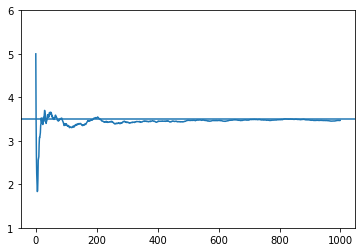

In [48]:
plt.plot(valor_promedio)
plt.axhline(E)
plt.ylim([1, 6])

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>